In [2]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

from ipywidgets import interact, widgets

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
# Load the Washington housing dataset
df1 = pd.read_csv('house_price_prediction.csv')
print("The Washington housing dataset has {} data points with {} variables each.".format(*df1.shape))
df1.head(2)

The Washington housing dataset has 4600 data points with 18 variables each.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


## EDA and Summary Statistics

In [4]:
# inspecting structure of dataframe & number of null values (if any)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [5]:
df1.describe()

#notice: price, bedrooms, & bathrooms have min of 0. Needs furthern investigation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Notice `price`, `bedrooms`, & `bathroom` have a minimum value of 0. Needs further investigation.

In [6]:
df2 = df1.copy()

# change date col to datetime
df2['date'] = pd.to_datetime(df2['date'])

# change data types of 'waterfront' & 'condition' to categorical
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category')

# remove country column since all houses are in the US, & city, state, zipcode are listed
df2 = df2.drop('country', axis='columns')

# split statezip into state & zipcode columns & remove statezip col
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0])
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')

# add total_sqft column: sqft_above + sqft_lot
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot

## Some statistics

In [7]:
# Minimum price of the data
minimum_price = round(np.amin(df2["price"]), 2)

# Maximum price of the data
maximum_price = round(np.amax(df2["price"]), 2)

# Mean price of the data
mean_price = round(np.mean(df2["price"]), 2)

# Median price of the data
median_price = round(np.median(df2["price"]), 2)

# Standard deviation of prices of the data
std_price = round(np.std(df2["price"]), 2)

# Show the calculated statistics
print("Statistics for Washington housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Washington housing dataset:

Minimum price: $0.0
Maximum price: $26590000.0
Mean price: $551962.99
Median price $460943.46
Standard deviation of prices: $563773.41


## Feature Observation

Confirm sqft_living is sqft_above + sqft_basement?

In [8]:
# Notice sqft_above & sqft_basement add up to sqft_living.
(df2.sqft_living == df2.sqft_above + df2.sqft_basement).all()

True

## Missing/zero values & outliers

### Zero Values

In [9]:
df3 = df2.copy()

# counting the number of zero values in each column
df3.isin([0]).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
state               0
zipcode             0
total_sqft          0
dtype: int64

Notice: `waterfront` & `view` have categorical values of 0 & 1.  
Nearly half of `yr_renovated` are 0.  
Inspect the 0s in `bedrooms` & `bathrooms`

In [10]:
# 0 Price

price_zero_len = round((len(df3[df3.price == 0])/len(df3)) * 100, 1)
print('There are {} houses worth $0, which are {}% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.'.format(len(df3[df3.price == 0]), price_zero_len))
print('')

df3['price_is_zero'] = (df3['price'] == 0).astype(int)

There are 49 houses worth $0, which are 1.1% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.



In [11]:
# 0 yr_renovated

# percentage of 'yr_renovated' col with 0 entries
yr_renov_0 = round((len(df3[df3['yr_renovated'] == 0]) / len(df3)) * 100, 1)
print("{}% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.".format(yr_renov_0))

df3['renov_date_is_zero'] = (df3['yr_renovated'] == 0).astype(int)

59.5% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.


In [12]:
# 0 bedrooms & bathrooms

df3[df3.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,state,zipcode,total_sqft,price_is_zero,renov_date_is_zero
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,...,0,1990,2009,814 E Howe St,Seattle,WA,98102,7828,0,0
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,...,0,1990,2009,20418 NE 64th Pl,Redmond,WA,98053,32818,0,0


There are 2 houses with 0s as their bedrooms & bathrooms shown above.  
We can see that the houses are both worth over 1 mil, therefore the 0s must be errors.  
Will replace 0s with the mean bedroom & bathroom values of 3 & 2 respectively.

In [13]:
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

### Outliers

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

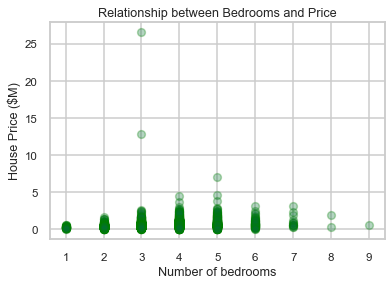

In [14]:
# Price

plt.scatter(df3["bedrooms"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')
#ax.set_facecolor('grey')

Notice 2 outliers priced around \\$13 M & \\$26 M.

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

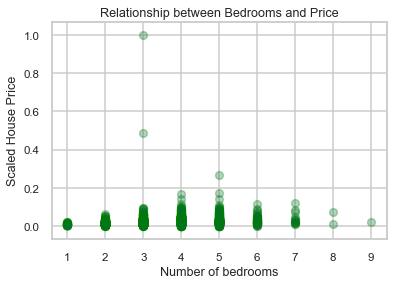

In [15]:
# normalized / scaled scatter plot of bedrooms vs price
X = df3["price"].values.reshape(-1,1)
X = MinMaxScaler().fit_transform(X)
plt.scatter(df3["bedrooms"], X, s=60, alpha=0.3, edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("Scaled House Price")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')

From the above plots we can see that majority of the houses are priced between 0 & 0.2, while 2 houses are at 0.5 & 1. (Find a statistical way of phrasing this.)

Text(0.5, 1.0, 'Relationship between Bedrooms and Price (Without Outliers)')

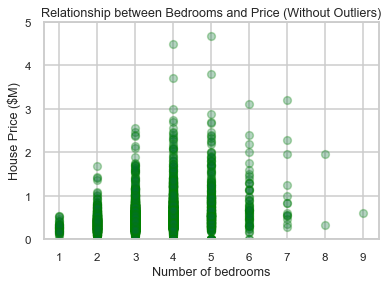

In [16]:
plt.scatter(df3["bedrooms"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.ylim((0, 5))
plt.title("Relationship between Bedrooms and Price (Without Outliers)")
#plt.grid('on')

A polynomial (quadratic) regression might fit the data better.  
(squared 'bedrooms' when modelling)

In [17]:
df3[df3.price > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,state,zipcode,total_sqft,price_is_zero,renov_date_is_zero
4346,2014-06-23,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,...,640,1956,2001,5426 40th Ave W,Seattle,WA,98199,13584,0,0
4350,2014-07-03,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,0,1992,0,12005 SE 219th Ct,Kent,WA,98031,8973,0,1


House price of greater than $10 milion might be too high for a 3 bedroom house.  
To determine if these 2 houses are outliers, inspect prices of other houses in their respective zipcodes.  
Also compare their total squarefootage. 

Text(0.5, 1.0, 'Total Square Footage vs Price')

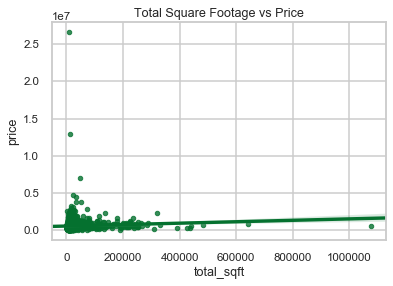

In [18]:
sns.regplot(data=df3, x='total_sqft', y='price', fit_reg=True, scatter_kws={'s':20})
plt.title("Total Square Footage vs Price")

The previous 2 plots confirm that the two houses priced over $10 mil are significantly more expensive than all other houses. So I will delete them in the next step.

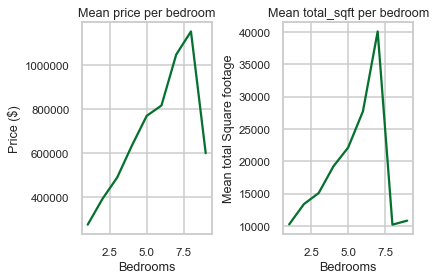

In [19]:
plt.subplot(1,2,1)
meanprice_bedrooms= df3.groupby("bedrooms")["price"].mean()
plt.plot(meanprice_bedrooms)
plt.title("Mean price per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($)")

plt.subplot(1,2,2)
mean_tot_sqft_bedroom = df3.groupby("bedrooms")["total_sqft"].mean()
plt.plot(mean_tot_sqft_bedroom)
plt.title("Mean total_sqft per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Mean total Square footage")

plt.tight_layout()
plt.show()

# Data Visualization

### Scatterplot matrix to visualize the pairwise relationships & correlations between features

'sns.pairplot(df4, height=2.5)\nplt.tight_layout()\n'

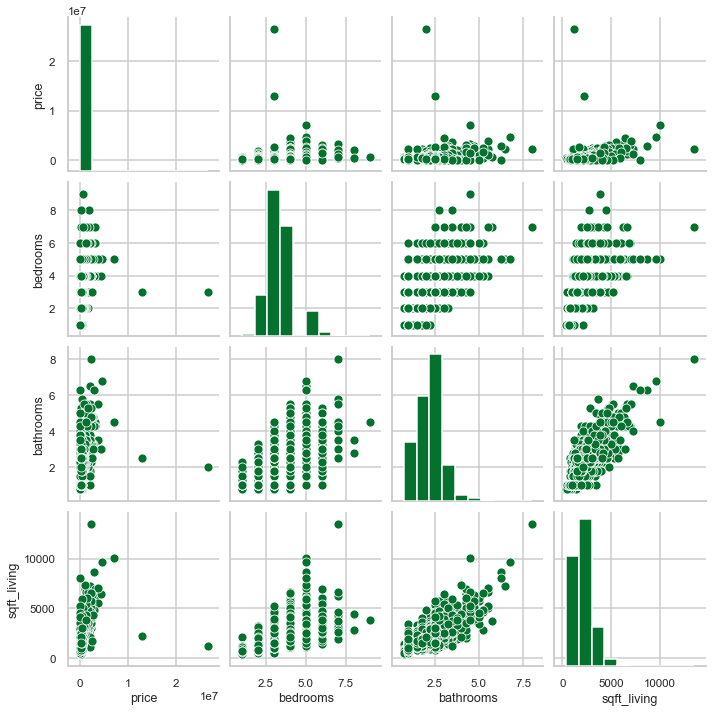

In [20]:
# This would be too much for all 15 features

features = df3[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

sns.pairplot(features, height=2.5)
plt.tight_layout()
'''sns.pairplot(df4, height=2.5)
plt.tight_layout()
'''

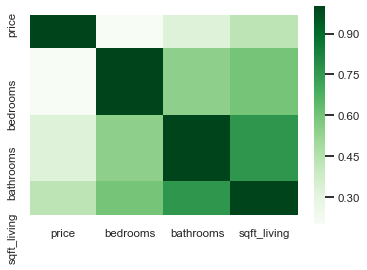

In [21]:
sns.heatmap(features.corr(), square=True, cmap='Greens')

### Heatmap using seaborn

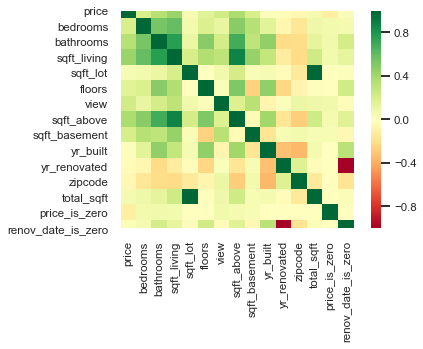

In [22]:
sns.heatmap(df3.corr(), square=True, cmap='RdYlGn')

## matplotlib / seaborn scatterplot

## sns hist plot

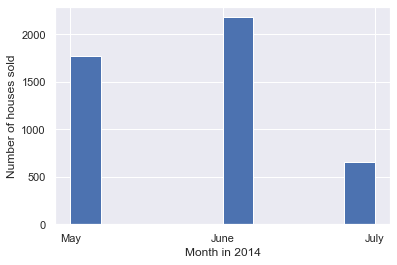

In [23]:
df4 = df3.copy()
df4['month'] = pd.DatetimeIndex(df4['date']).month
#df4.month.unique()

# plot sns plot by month.. 
# the dummy variable '_' is used to prevent unnecessary output from being displayed

sns.set()
_ = plt.hist(df4['month'])
_ = plt.xticks([5,6,7], ['May','June','July'])
_ = plt.xlabel('Month in 2014')
_ = plt.ylabel('Number of houses sold')
plt.show()

## Checking for trends

In [24]:
def plotmonth(month):
    data = df4[df4.month == month]
    #colors = df4.bedrooms.map({1: 'skyblue', 2: 'skyblue', 3: 'skyblue', 4: 'skyblue', 
                              # 5: 'gold', 6: 'gold', 7: 'gold', 8: 'gold', 9: 'gold'})
    
    data.plot.scatter('bedrooms', 'price', edgecolors='k', figsize=(9,6))
    
    plt.axis(ymin=0, ymax=4000000, xmin=0, xmax=10)
    plt.xlabel('bedrooms')
    plt.ylabel('price')

In [25]:
interact(plotmonth, month=widgets.IntSlider(min=5, max=7, step=1, value=5))

interactive(children=(IntSlider(value=5, description='month', max=7, min=5), Output()), _dom_classes=('widget-…

<function __main__.plotmonth(month)>

### Try the same with total_sqft & price

In [26]:
def plotmonth(month):
    data = df4[df4.month == month]
    #colors = df4.bedrooms.map({1: 'skyblue', 2: 'skyblue', 3: 'skyblue', 4: 'skyblue', 
                              # 5: 'gold', 6: 'gold', 7: 'gold', 8: 'gold', 9: 'gold'})
    
    data.plot.scatter('total_sqft', 'price', edgecolors='k', figsize=(9,6))
    
    plt.axis(ymin=0, ymax=4000000, xmin=1423, xmax=500000) # there's a house with 1,100,000 total_sqft. look into it.
    plt.xlabel('total_sqft')
    plt.ylabel('price')

In [27]:
interact(plotmonth, month=widgets.IntSlider(min=5, max=7, step=1, value=5))

interactive(children=(IntSlider(value=5, description='month', max=7, min=5), Output()), _dom_classes=('widget-…

<function __main__.plotmonth(month)>

## Models

In [28]:
df3.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'state',
       'zipcode', 'total_sqft', 'price_is_zero', 'renov_date_is_zero'],
      dtype='object')

In [29]:
X = df3.drop(['price', 'date', 'street', 'city', 'state'], axis='columns')
y = df3.price

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
lr = LinearRegression()

# Fit the regressor to the training data
lr.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lr.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.06760367184345151
Root Mean Squared Error: 820738.4338957351


Text(0.5, 1.0, 'Relationship between predicted price and actual price')

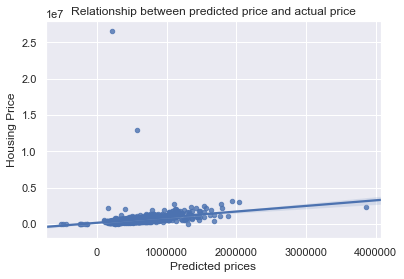

In [30]:
#sns.regplot(y_pred, y_test, fit_reg=True, scatter_kws={"s": 30})
sns.regplot(y_pred, y_test, fit_reg=True, scatter_kws={'s':20})
plt.xlabel("Predicted prices")
plt.ylabel("Housing Price")
plt.title("Relationship between predicted price and actual price")

In [31]:
df5 = df3.copy()
df5['price'] = df5[df5.price < 10000000]

X2 = df5.drop(['price', 'date', 'street', 'city', 'state'], axis='columns')
#X2 = df5["total_sqft"].values.reshape(-1, 1)
y2 = df5["price"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
lr = LinearRegression()

# Fit the regressor to the training data
lr.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lr.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [32]:
X1 = df3["total_sqft"].values.reshape(-1, 1)
y1 = df3["price"]
lr_1 = LinearRegression()
lr_1 = lr_1.fit(X1, y1)
score1 = lr_1.score(X1, y1)
y_pred1 = lr_1.predict(X1)


X2 = df3[["total_sqft", "renov_date_is_zero"]]
y2 = df3["price"]
lr_2 = LinearRegression()
lr_2 = lr_2.fit(X2, y2)
score2 = lr_2.score(X2, y2)
y_pred2 = lr_2.predict(X2)

X3 = df3.drop(['price', 'date', 'street', 'city', 'state'], axis='columns')
y3 = df3["price"]
lr_3 = LinearRegression()
lr_3 = lr_3.fit(X3, y3)
score3 = lr_3.score(X3, y3)
y_pred3 = lr_3.predict(X3)

In [33]:
features1 = 'total_sqft'
features2 = 'total_sqft', 'rennovation_date_is_zero'
features3 = 'all'

content = {'features': [features1, features2, features3], 'model': ['linear regression', 'linear regression', 'linear regression'], 
          'score': [score1, score2, score3]}

pd.DataFrame(content, columns=['features', 'score', 'model'], index=[1,2,3])

,features,score,model
1,total_sqft,0.003799,linear regression
2,"(total_sqft, rennovation_date_is_zero)",0.004527,linear regression
3,all,0.238003,linear regression


In [34]:
# for loop: to construct model accuracy table
# comparing feature selection & feature engineering
''' first file will be with either entire 'yr_renovated' 
    col deleted
    
    second file will be with the added boolean array col 'renov_date_is_zero'
'''

yr_ren_dropped = df3.drop('yr_renovated', axis='columns')
df3.to_csv('w_yr_renov.csv', index=False) #with yr_renovated col
yr_ren_dropped.to_csv('wo_yr_renov.csv', index=False) # without yr_renovated col

files = ['w_yr_renov.csv', 'wo_yr_renov.csv']

for file in files:
    df = pd.read_csv(file) # import 
    
    possible_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'total_sqft', 'rennovation_date_is_zero']
    
    for i in range(len(possible_features)-2):
        features = [name for name in df.columns if name in possible_features[i:]]
    
        X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], test_size=0.10, random_state=42)
    
        lr = LinearRegression()
    
        model = lr.fit(X_train, y_train)
    
        train_score = lr.score(X_train, y_train)

        score = lr.score(X_test, y_test)

        print(i, file, train_score, score, features) # record into a table

0 w_yr_renov.csv 0.20300246897130048 0.5578735680895225 ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'total_sqft']
1 w_yr_renov.csv 0.1977095355961085 0.5510243769107812 ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'total_sqft']
2 w_yr_renov.csv 0.19695153054851688 0.5511647594462425 ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'total_sqft']
3 w_yr_renov.csv 0.19695153054851666 0.5511647594459399 ['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'total_sqft']
4 w_yr_renov.csv 0.0785038531667176 0.27938891909434294 ['floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'total_sqft']
5 w_yr_renov.csv 0.055752575476506465 0.21808825072937055 ['waterfront', 'view', 'condition', '